# Introducción del proyecto

Nuestro cliente Interconnect, quien se dedica a ofrecer servicios de telecomunicaciones, le gustaría poder pronosticar su tasa de cancelación de clientes. Y nos ha solicitado que diseñemos un modelo de aprendizaje automático que prediga cuando un usuario o usuaria planea irse. Lo anterior con el fin de ofrecerle a dichos clientes códigos promocionales y opciones de planes especiales para buscar retenerlos. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de los clientes, incluyendo información sobre sus planes y contratos. Toda esta información se nos ha compartido y será tratada con total confidencialidad.

# Carga de librerías

In [ ]:
# En esta celda vamos a cargar todas las librerías necesarias para el proyecto.
import pandas as pd
import matplotlib.pyplot as plt

# Carga de los datos

In [ ]:
# Cargamos los datos compartidos por nuestro cliente y creamos dataframes para poder observar y trabajar con los mismos.
contract_info = pd.read_csv('/datasets/final_provider/contract.csv', na_values=['', ' ', 'N/A', 'na', 'null'])
customer_info = pd.read_csv('/datasets/final_provider/personal.csv', na_values=['', ' ', 'N/A', 'na', 'null'])
internet_services = pd.read_csv('/datasets/final_provider/internet.csv', na_values=['', ' ', 'N/A', 'na', 'null'])
phone_services = pd.read_csv('/datasets/final_provider/phone.csv', na_values=['', ' ', 'N/A', 'na', 'null'])

# Análisis exploratorio de datos (EDA)

## Comprensión de los conjuntos de datos

Veamos la forma, los tipos de datos, que contienen las columnas de cada uno de los dataframes así como una muestra de sus datos.

In [ ]:
print('Información de los contratos')
contract_info.info()
contract_info.sample(5)

Información de los contratos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1573,5014-WUQMG,2016-03-01,No,One year,Yes,Electronic check,96.10,4391.45
4650,6509-TSGWN,2017-01-01,No,Month-to-month,No,Mailed check,26.45,911.60
1337,6265-FRMTQ,2017-07-01,No,Two year,No,Bank transfer (automatic),20.40,609.10
3876,7392-YYPYJ,2018-04-01,No,Month-to-month,Yes,Electronic check,100.65,2415.95
1290,3108-PCCGG,2014-02-01,No,Two year,No,Credit card (automatic),84.45,5899.85


In [ ]:
print('Información de los clientes')
customer_info.info()
customer_info.sample(5)

Información de los clientes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
1611,1971-DTCZB,Female,0,Yes,No
5662,3244-DCJWY,Female,0,No,No
2824,8857-CUPFQ,Male,0,Yes,No
5607,2460-FPSYH,Female,1,No,No
5203,0734-OXWBT,Male,0,No,Yes


In [ ]:
print('Información de los servicios de internet')
internet_services.info()
internet_services.sample(5)

Información de los servicios de internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3479,6695-AMZUF,DSL,Yes,Yes,Yes,Yes,Yes,Yes
552,1536-HBSWP,DSL,No,No,No,Yes,No,No
4923,5872-OEQNH,DSL,Yes,No,Yes,No,No,Yes
872,8659-IOOPU,Fiber optic,Yes,No,Yes,Yes,No,Yes
589,6647-ZEDXT,Fiber optic,No,Yes,Yes,Yes,Yes,Yes


In [ ]:
print('Información de los servicios de teléfono')
phone_services.info()
phone_services.sample(5)

Información de los servicios de teléfono
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
4752,2056-EVGZL,No
1587,0106-GHRQR,Yes
5570,4009-ALQFH,No
5587,0644-OQMDK,No
3446,0310-VQXAM,No


**Hallazgos de la comprensión de los conjuntos de datos:**  
1. La forma de los conjuntos de datos no es la misma en todos ellos, lo que sugiere que puedan haber valores repetidos.  
2. Los nombres de las columnas no cumplen con las reglas del "buen estilo", por lo que será necesario cambiarlos.
3. Los tipos de datos en el dataframe de los contratos de los clientes, no son los más apropiados en todos los casos, se tendrán que convertir los que apliquen.
4. Existen valores vacíos en el dataframe de la información de los contratos.

**Dudas de la comprensión de los conjuntos de datos:**  
1. En el dataframe de los contratos de los clientes, en la columna "EndDate", ¿Si el valor es igual a "No", significa que no ha terminado aún su contrato? Si ese es el caso, entonces ¿Qué fecha podemos considerar para calcular la duración de los contratos de esos clientes?.
2. En el apartado de "Condiciones de la asignación principal", ¿A qué se refiere con "La información del contrato es válida a partir del 1 de febrero de 2020"? y ¿Cómo esta relacionada la anterior afirmación con nuestros datos?
3. En el dataframe de la información de los clientes, ¿A que se refieren las columnas "Partner" y "Dependents"?


## Valores faltantes y duplicados

Ya hemos visto en el punto anterior que solo hay valores faltantes o nulos en el dataframe de la información de los contratos y también vimos que podrían haber valores duplicados en algunos de los dataframes, por lo tanto vamos a confirmar o descartar dicha observación:

In [ ]:
# Buscamos filas duplicadas en cada uno de los dataframes.
print("Número de filas duplicadas en infromación de los contratos:", contract_info.duplicated().sum())
print("Número de filas duplicadas en infromación de los clientes:", customer_info.duplicated().sum())
print("Número de filas duplicadas en servicios de internet:", internet_services.duplicated().sum())
print("Número de filas duplicadas en servicios de teléfono:", phone_services.duplicated().sum())

Número de filas duplicadas en infromación de los contratos: 0
Número de filas duplicadas en infromación de los clientes: 0
Número de filas duplicadas en servicios de internet: 0
Número de filas duplicadas en servicios de teléfono: 0


In [ ]:
# Vamos a realizar una imputación para los valores ausentes del dataframe de la información de los contratos, en la columna "TotalCharges".
# Para definir con que valores sustituir los valores ausentes en la columna "TotalCharges", veremos si hay valores atípicos.

# Obtenemos la media y la mediana de la columna "TotalCharges".
totalcharges_mean = contract_info['TotalCharges'].mean()
totalcharges_median = contract_info['TotalCharges'].median()
print(f"La media del total de cargos es: {totalcharges_mean:.2f}")
print(f"La mediana del  total de cargos es: {totalcharges_median:.2f}")

# Como si hay gran diferenia entre la media y la mediana de los valores de la columna "TotalCharges", podemos concluir que si hay valores atípicos en esta,
# por lo que rellenaremos los valores ausentes de la columna anterior, con la mediana de la misma.

contract_info['TotalCharges'].fillna(totalcharges_median, inplace=True)

La media del total de cargos es: 2283.30
La mediana del  total de cargos es: 1397.47


**Hallazgos de valores faltantes y duplicados:**  
1. Confirmamos que si hay valores ausentes en el dataframe "contract_info" y que no hay valores duplicados en ninguno de los dataframes.
2. Imputamos los valores ausentes en la columna "TotalCharges" del dataframe "contract_info" con la mediana de los valores de la misma.

## Preparación preliminar

Atenderemos algunos de los hayazgos de la sección "Comprensión de los conjuntos de datos" para convertir tipos de datos incorrectos y corregir el estilo de los nombres de las columnas. Todo eso nos ayudará en los próximos pasos de nuestro EDA.

In [ ]:
# Comenzamos corrigiendo el estilo de los nombres de las columnas de cada dataframe, para lo cual crearemos una función que nos ayude con la tarea.
def lower_names (dataframe):
    new_col_names = []
    for column_name in dataframe.columns:
        lower_name = column_name.lower()
        new_col_names.append(lower_name)
    dataframe.columns = new_col_names

In [ ]:
# Aplicamos nuestra función a cada uno de los dataframes para corregir el estilo de los nombres de sus columnas.
lower_names(contract_info)
lower_names(customer_info)
lower_names(internet_services)
lower_names(phone_services)

In [ ]:
# Continuamos convirtiendo los tipos de datos que consideramos que no son los adecuados para las columnas de los dataframes correspondientes.
# Comencemos con el dataframe de la información de los contratos.
contract_info['begindate'] = pd.to_datetime(contract_info['begindate'], format='%Y-%m-%d', errors='coerce')

# Validamos si hay errores, productos de la transformación.
print("Errores por transformación de begindate: ", contract_info['begindate'].isnull().sum())

# Vamos a extraer tanto el año como el mes de inicio de los contratos de los clientes.
contract_info['beginyear'] = contract_info['begindate'].dt.year
contract_info['beginmonth'] = contract_info['begindate'].dt.month

# Acomodamos las nuevas columnas.
contract_info = contract_info[['customerid', 'begindate', 'beginyear', 'beginmonth', 'enddate', 'type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges']]

Errores por transformación de begindate:  0


**Hallazgos de preparación preliminar:**  
1. Todas las fechas de inicio de los contratos comienzan en el primer día del mes, por lo que no veo necesario extraer el días de las mismas.
2. Se transformaron los datos de la columna "begindate" a Timestamps y se extrayeron tanto el año como el mes de las mismas, esto en el dataframe "contract_info".  
3. Hasta resolver la duda de qué fecha considerar para el cálculo de la duración de los contratos, convertiremos los datos de la columna "enddate"

## Estadísticas descriptivas

Vamos a buscar estadísticas que nos permitan conocer mejor los dataframes, además de sacar algunas conclusiones.

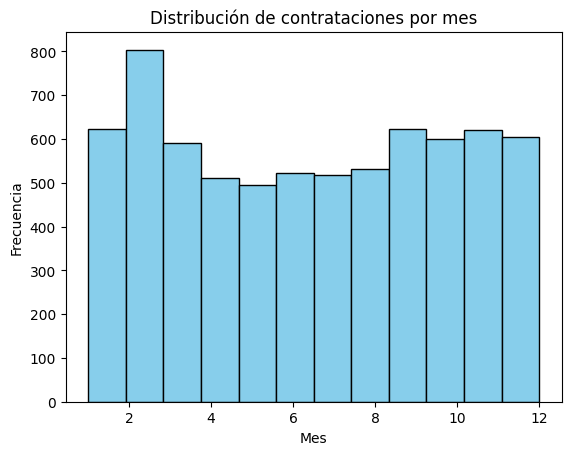

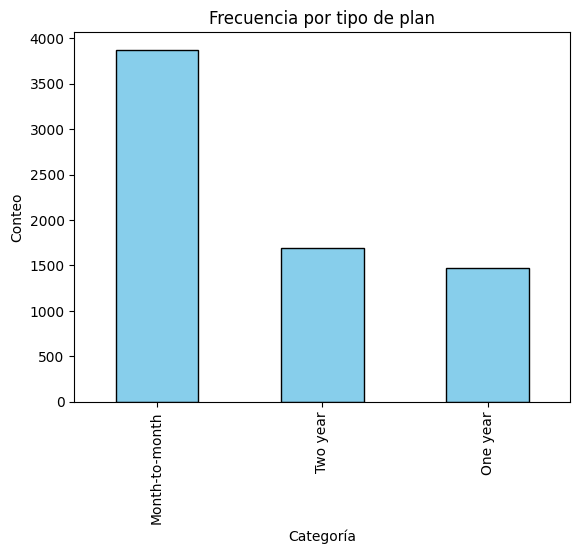

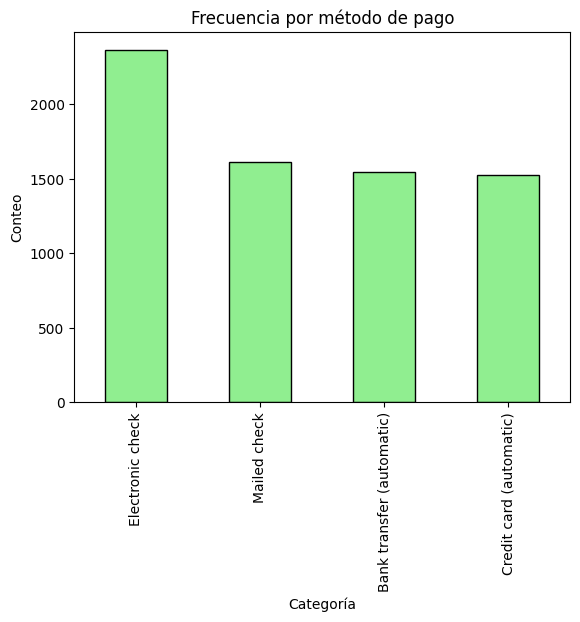

Estadísticas de cargos mensuales y totales
       monthlycharges  totalcharges
count     7043.000000   7043.000000
mean        64.761692   2281.916928
std         30.090047   2265.270398
min         18.250000     18.800000
25%         35.500000    402.225000
50%         70.350000   1397.475000
75%         89.850000   3786.600000
max        118.750000   8684.800000


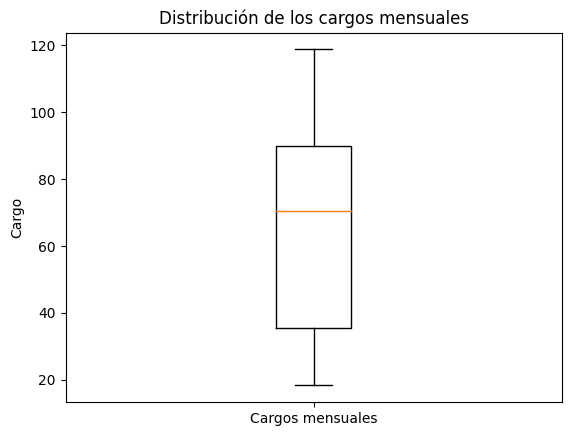

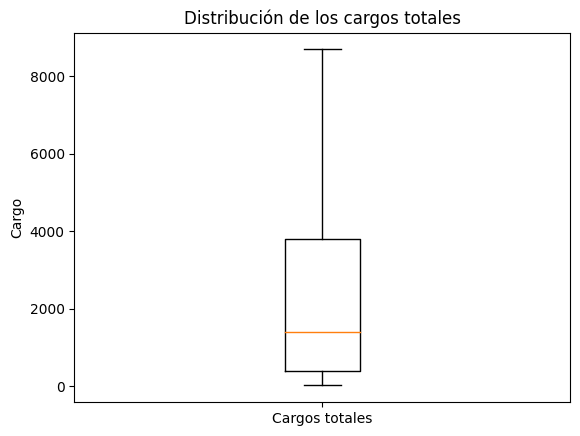

In [ ]:
# Comenzamos con el dataframe "contract_info"
# Vamos a ver las contrataciones de servicios por mes a traves de un histograma.
plt.hist(contract_info['beginmonth'], bins=12, color='skyblue', edgecolor= "black")
plt.title('Distribución de contrataciones por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

# Vamos a ver las frecuencias de las variables categóricas.
contract_info['type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia por tipo de plan')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

contract_info['paymentmethod'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frecuencia por método de pago')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

# Vamos a ver algunas estadísticas de las variables numéricas.
print('Estadísticas de cargos mensuales y totales')
print(contract_info[['monthlycharges','totalcharges']].describe())

# Veamos si existen valores atípicos para los cargos mensuales y totales.
plt.boxplot(contract_info['monthlycharges'])
plt.title('Distribución de los cargos mensuales')
plt.ylabel('Cargo')
plt.xticks([1], ["Cargos mensuales"])
plt.show()

plt.boxplot(contract_info['totalcharges'])
plt.title('Distribución de los cargos totales')
plt.ylabel('Cargo')
plt.xticks([1], ["Cargos totales"])
plt.show()


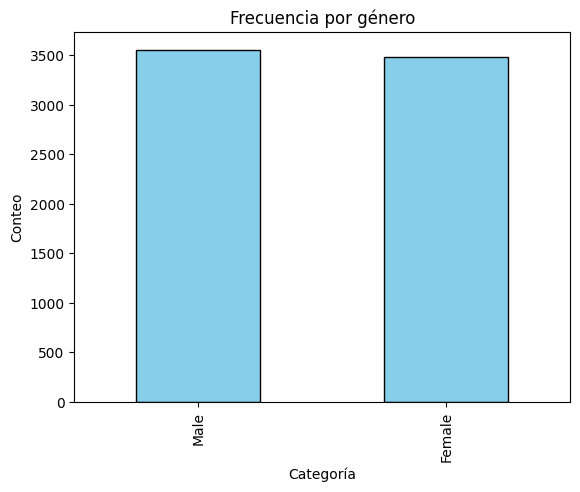

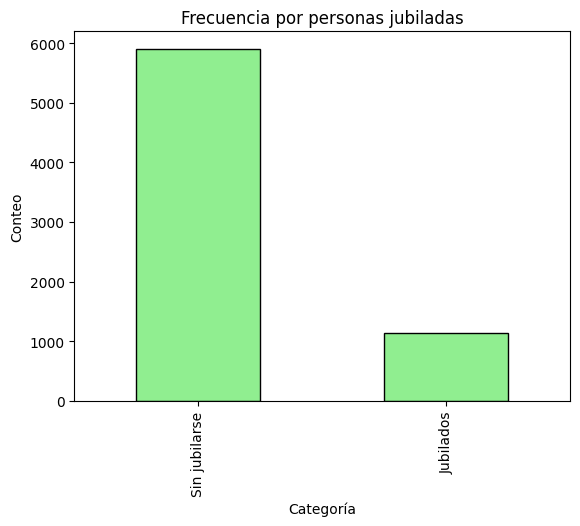

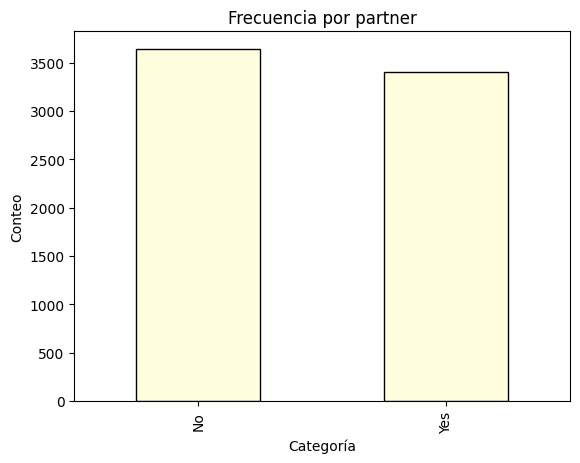

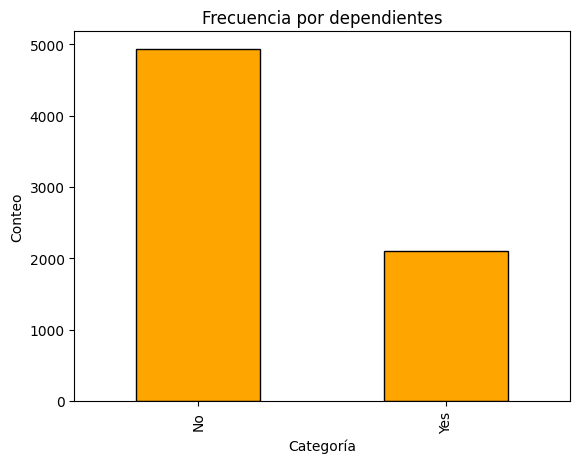

In [ ]:
# Continuemos con el dataframe "customer_info".
# Vamos a ver las frecuencias de las variables categóricas.
customer_info['gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia por género')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

customer_info['seniorcitizen'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frecuencia por personas jubiladas')
plt.xlabel('Categoría')
plt.xticks(ticks=[0,1], labels=["Sin jubilarse", "Jubilados"])
plt.ylabel('Conteo')
plt.show()

customer_info['partner'].value_counts().plot(kind='bar', color='lightyellow', edgecolor='black')
plt.title('Frecuencia por partner')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

customer_info['dependents'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frecuencia por dependientes')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()


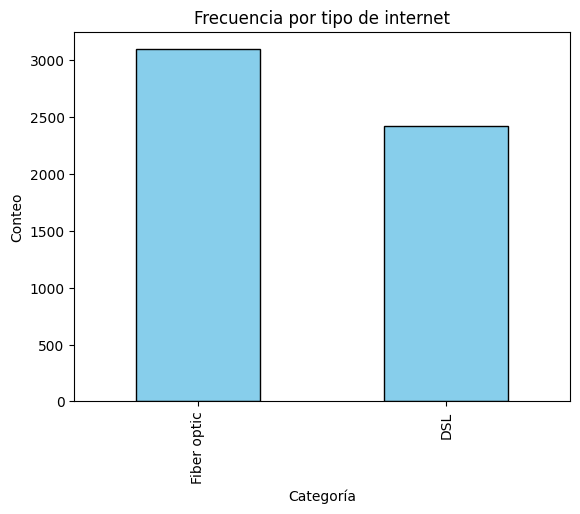

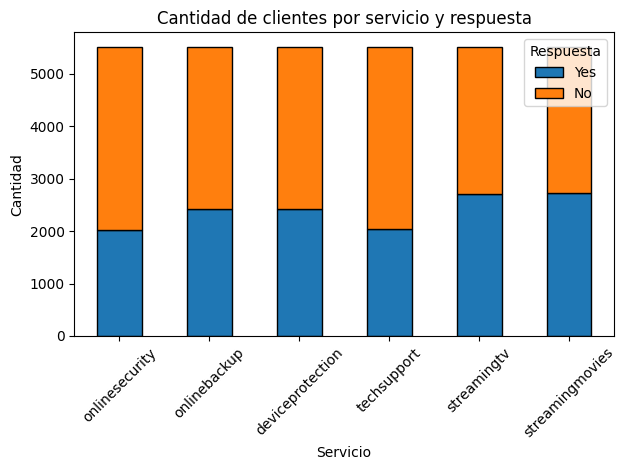

In [ ]:
# Ahora continuemos con el dataframe "internet_services".
# Vamos a ver las frecuencias de las variables categóricas.
internet_services['internetservice'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia por tipo de internet')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

services=['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']
counter = internet_services[services].apply(pd.Series.value_counts).T
counter = counter.fillna(0)
counter = counter[['Yes', 'No']]
counter.plot(kind='bar', edgecolor='black', stacked=True)
plt.title('Cantidad de clientes por servicio y respuesta')
plt.xlabel('Servicio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Respuesta')
plt.tight_layout()
plt.show()

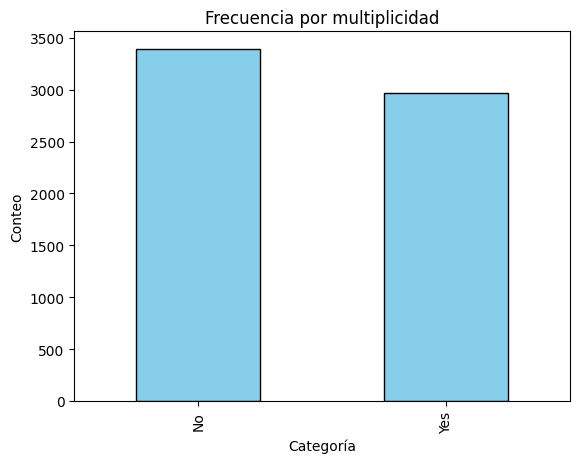

In [ ]:
# Finalizamos con el dataframe "phone_services".
# Vamos a ver las frecuencias de las variables categóricas.
phone_services['multiplelines'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia por multiplicidad')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

**Hayazgos de las estadísticas descriptivas**  
*Dataframe de la información de los contratos de los clientes*  
1. Parece haber una tendencia temporal a lo largo de los años, donde el més en el que se hacen más contrataciones es en el mes de Febrero y en el que se hacen menos contrataciones es en el mes de Mayo.  
2. El plan más popular es el mensual y el menos es el de dos años.  
3. El cheque electrónico es el método de pago preferido, mientras que no hay gran diferencia con los demás.  
4. El cargo mensual promedio es de 64.76, el máximo es de 118.75 y no hay valores atípicos.
5. El cargo total promedio es de 2,282, el máximo es de 8,685 y no hay valores atípicos.

*Dataframe de la información de los clientes*  
1. Los géneros están equilibrados en la base de datos de los clientes, casi en una proporción 50:50.
2. La mayoría de los clientes aún no se jubilan.
3. Los "partners" están también equilibrados, pero los "dependientes" no lo están, la mayoría no son dependientes.

*Dataframe de la información de los servicios de internet*  
1. La fibra óptica es la preferida entre los clientes.
2. Hay preferencia por los servicios de streaming, después por la protección de dispositivos y los respaldos y por último por el soporte en línea y la ciberseguridad. Además la mayoría de los clientes prefieren no contratar servicios adicionales a su plan.

*Dataframe de la información de los servicios telefónicos*  
1. La mayoría de los clientes tiene más de una línea telefónica, pero no es muchas la diferencia con respecto a los que solo tienen una.

# Preguntas aclaratorias con líder de equipo

**Dudas de la comprensión de los conjuntos de datos:**  
1. En el dataframe de los contratos de los clientes, en la columna "EndDate", ¿Si el valor es igual a "No", significa que no ha terminado aún su contrato? Si ese es el caso, entonces ¿Qué fecha podemos considerar para calcular la duración de los contratos de esos clientes?.
2. En el apartado de "Condiciones de la asignación principal", ¿A qué se refiere con "La información del contrato es válida a partir del 1 de febrero de 2020"? y ¿Cómo esta relacionada la anterior afirmación con nuestros datos?
3. En el dataframe de la información de los clientes, ¿A que se refieren las columnas "Partner" y "Dependents"?

# Plan aproximado

## 1. Análisis exploratorio de datos (Segunda parte)

Ressolviendo las dudas anteriores, me gustaría complementar el EDA realizado hasta ahorita para comprender mejor los dataframes y además de extraer mayor información.

## 2. Preprocesamiento de datos

Al tratarse de un modelo de aprendizaje automático (machine learning), en este caso de clasificación binaria. Necesitamos procesar los datos antes del entrenamiento y esto incluye concatenar los dataframes, transformar valores, estandarizar valores, entre otras cosas.

## 3. Partición de los datos

Hay que separar los datos en conjuntos de entrenamiento y validación.

## 4. Entrenar los modelos

Vamos a entrenar los modelos seleccionados.

## 5. Evaluar y seleccionar el mejor modelo

Utilizando la métrica especificada en los criterios del proyecto, vamos a evaluar los modelos y elegiremos el mejor.